# Step 1: Import Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Utility Function to Display Images

In [ ]:
def show_image(img, title='', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 2: Load and Resize the Image to 512x512 (if not already)

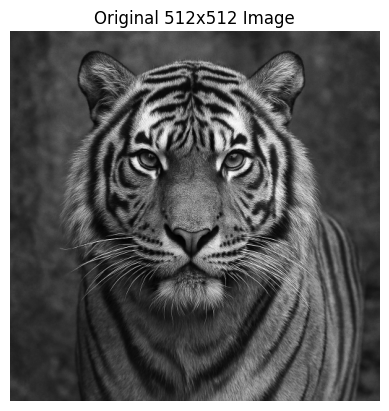

In [6]:
image = cv2.imread('images/tiger.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

show_image(image, title='Original 512x512 Image')

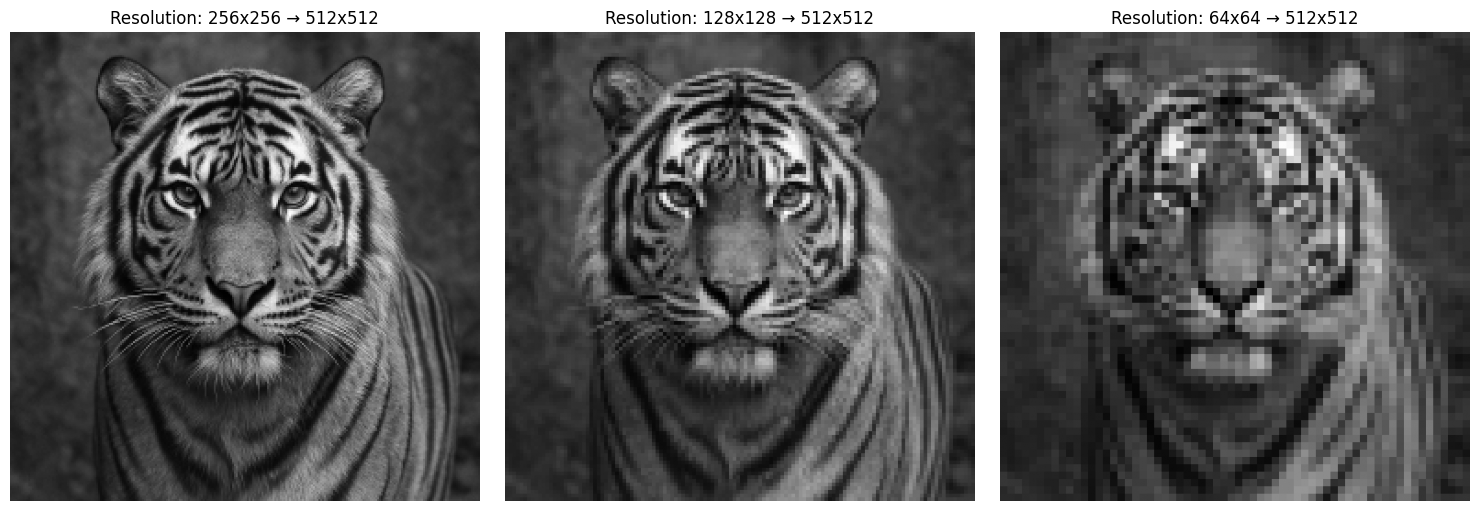

In [7]:
# Step 3: Downsample Spatial Resolution by Half Each Time

res_256 = cv2.resize(image, (256, 256))
res_128 = cv2.resize(res_256, (128, 128))
res_64 = cv2.resize(res_128, (64, 64))

# Upsample to 512x512 for visual consistency
up_res_256 = cv2.resize(res_256, (512, 512), interpolation=cv2.INTER_NEAREST)
up_res_128 = cv2.resize(res_128, (512, 512), interpolation=cv2.INTER_NEAREST)
up_res_64 = cv2.resize(res_64, (512, 512), interpolation=cv2.INTER_NEAREST)

# Display results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(up_res_256, cmap='gray')
axs[0].set_title('Resolution: 256x256 → 512x512')
axs[1].imshow(up_res_128, cmap='gray')
axs[1].set_title('Resolution: 128x128 → 512x512')
axs[2].imshow(up_res_64, cmap='gray')
axs[2].set_title('Resolution: 64x64 → 512x512')
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

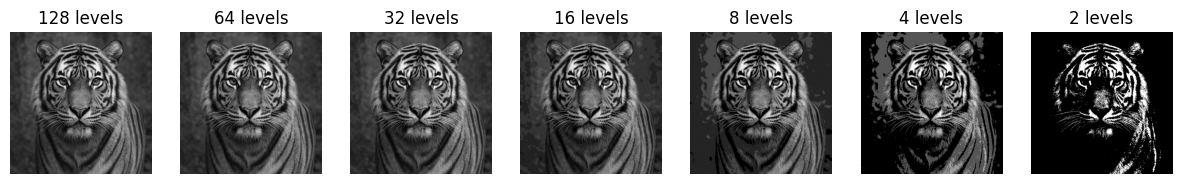

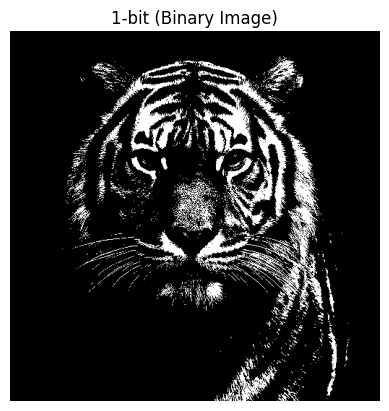

In [8]:
# Step 4: Decrease Intensity Resolution (Bit Depth)

def reduce_bit_depth(img, bits):
    levels = 2 ** bits
    factor = 256 // levels
    return (img // factor) * factor

plt.figure(figsize=(15, 3))
for i, bits in enumerate(range(7, 0, -1)):
    reduced_img = reduce_bit_depth(image, bits)
    plt.subplot(1, 7, i+1)
    plt.imshow(reduced_img, cmap='gray')
    plt.title(f'{2**bits} levels')
    plt.axis('off')

# 1-bit (binary)
binary_img = reduce_bit_depth(image, 1)
plt.figure()
plt.imshow(binary_img, cmap='gray')
plt.title('1-bit (Binary Image)')
plt.axis('off')
plt.show()


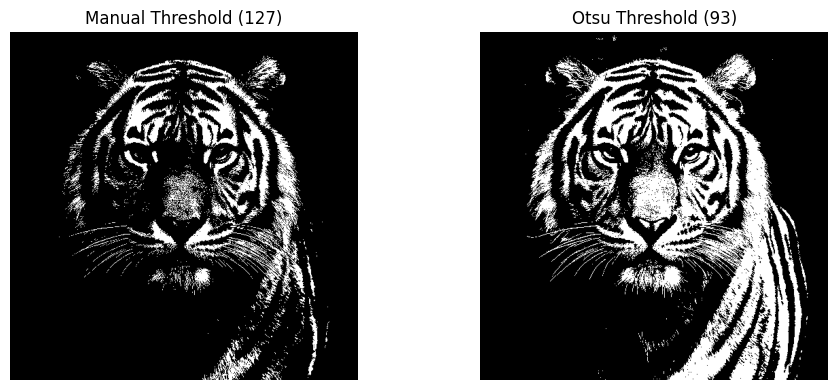

In [9]:
# Step 6: Threshold Segmentation from Histogram

# Manual threshold at 127
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# OR use Otsu’s method for automatic thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(thresholded, cmap='gray')
plt.title('Manual Threshold (127)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f'Otsu Threshold ({int(_):d})')
plt.axis('off')

plt.tight_layout()
plt.show()
